In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests

In [3]:
timeseries_tests = pd.DataFrame(requests.get("https://covidtracking.com/api/states/daily").json())
timeseries_tests['stateName'] = timeseries_tests.state
timeseries_tests['dateColumn'] = pd.to_datetime(timeseries_tests.dateChecked)
timeseries_tests = timeseries_tests.sort_values('dateColumn')

In [4]:
grouped_timeseries = timeseries_tests.groupby(['state', 'dateChecked']).min()

In [5]:
grouped_timeseries['positive_ratio'] = grouped_timeseries.positive / grouped_timeseries.total

In [18]:
_states = {
    'FL': 'green',
    'NY': 'red',
    'CA': 'yellow',
    'WA': 'blue',
    'MD': 'orange',
    "MT": "purple"
}

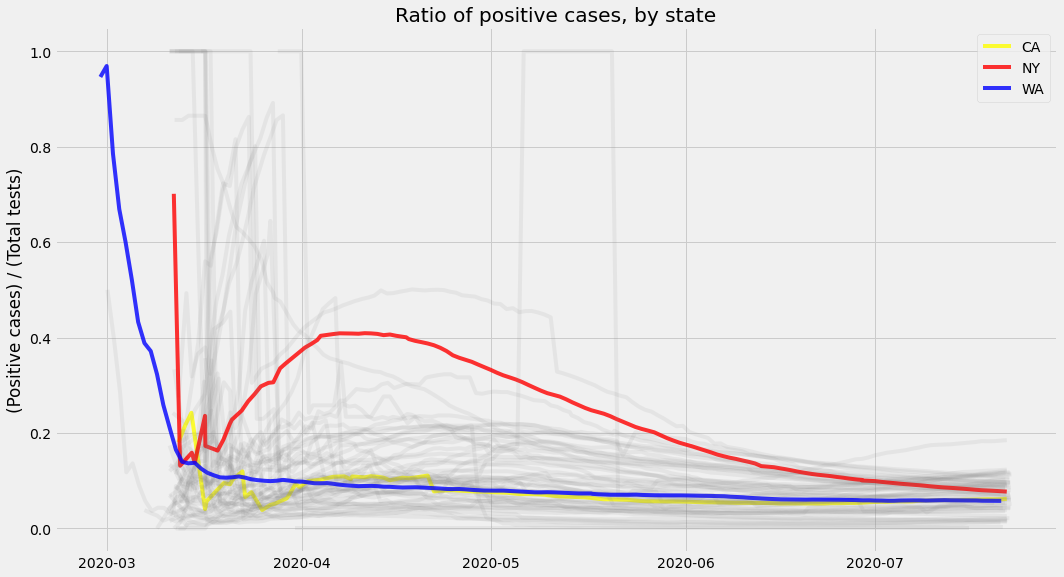

In [7]:
with plt.style.context("fivethirtyeight"):
    plt.figure(figsize=(16, 9))
    for state in list(grouped_timeseries.stateName.unique()):
        plt.plot(
            grouped_timeseries.loc[state, :].dateColumn,
            grouped_timeseries.loc[state, :].positive_ratio,
            c = _states[state] if state in _states else 'grey',
            alpha = 0.8 if state in _states else 0.1,
            label = state if state in _states else None
        )
    plt.title("Ratio of positive cases, by state")
    plt.ylabel("(Positive cases) / (Total tests)")
    plt.legend()
    plt.show()

/Users/mateljk1/.pyenv/versions/3.7.7/envs/scripting/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.
  # This is added back by InteractiveShellApp.init_path()
/Users/mateljk1/.pyenv/versions/3.7.7/envs/scripting/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.
  # This is added back by InteractiveShellApp.init_path()
/Users/mateljk1/.pyenv/versions/3.7.7/envs/scripting/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.
  # This is added back by InteractiveShellApp.init_path()


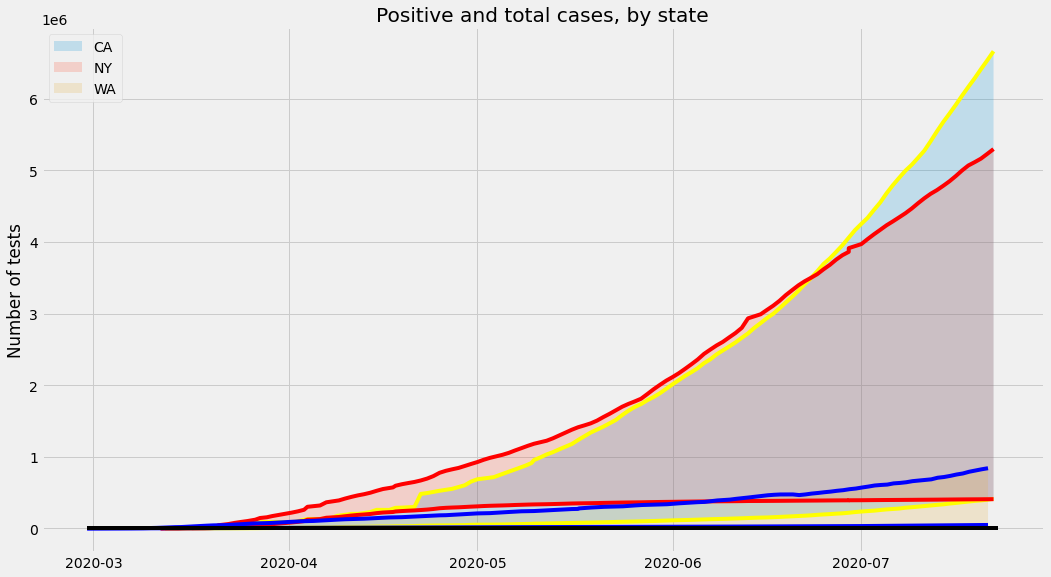

In [8]:
with plt.style.context("fivethirtyeight"):
    plt.figure(figsize=(16, 9))
    for state in list(grouped_timeseries.stateName.unique()):
        if state in _states:
            plt.fill_between(
                grouped_timeseries.loc[state, :].dateColumn,
                grouped_timeseries.loc[state, :].positive,
                grouped_timeseries.loc[state, :].total,
                _states[state] if state in _states else 'grey',
                alpha=0.2,
                label=state
            )
            plt.plot(
                grouped_timeseries.loc[state, :].dateColumn,
                grouped_timeseries.loc[state, :].total,
                _states[state] if state in _states else 'grey',
                alpha=1,
                label=None
            )
            plt.plot(
                grouped_timeseries.loc[state, :].dateColumn,
                grouped_timeseries.loc[state, :].positive,
                _states[state] if state in _states else 'grey',
                alpha=1,
                label=None
            )
        plt.plot(
            grouped_timeseries.loc[state, :].dateColumn,
            grouped_timeseries.loc[state, :].total * 0,
            c='black',
            alpha=1, label=None
        )

    plt.legend(loc='upper left')
    plt.title("Positive and total cases, by state")
    plt.ylabel("Number of tests")
    plt.show()    

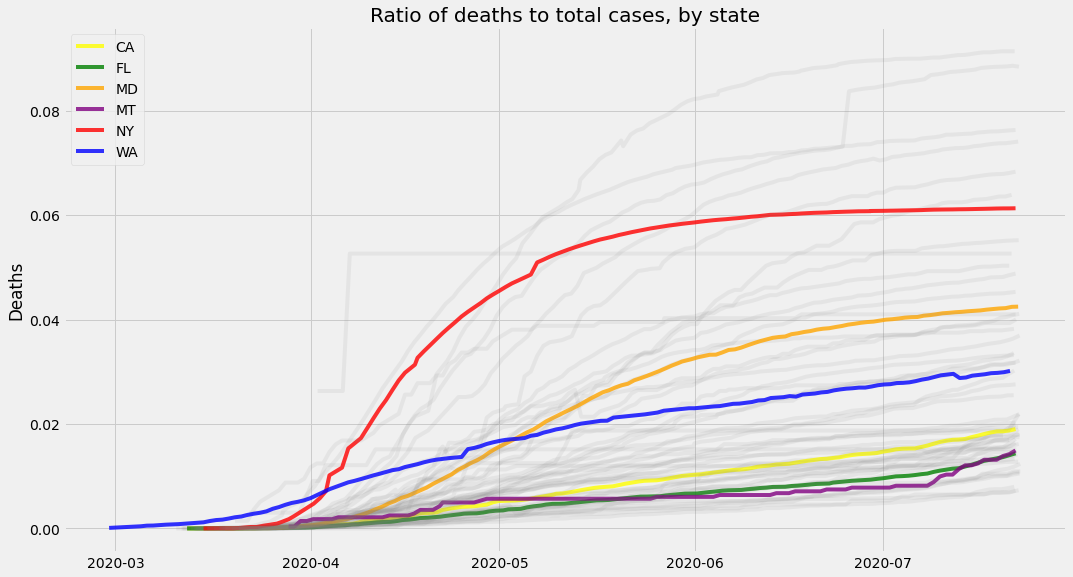

In [19]:
with plt.style.context("fivethirtyeight"):
    plt.figure(figsize=(16, 9))
    for state in list(grouped_timeseries.stateName.unique()):
        plt.plot(
            grouped_timeseries.loc[state, :].dateColumn,
            grouped_timeseries.loc[state, :].death / max(grouped_timeseries.loc[state, :].positive),
            c = _states[state] if state in _states else 'grey',
            alpha = 0.8 if state in _states else 0.1,
            label = state if state in _states else None
        )
    plt.title("Ratio of deaths to total cases, by state")
    plt.ylabel("Deaths")
    plt.legend()
    plt.show()